# Multi Class Classification 
- A classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Multi-class classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time. 
- Common examples include image classification (is it a cat, dog, human, etc) or handwritten digit recognition (classifying an image of a handwritten number into a digit from 0 to 9).
- In machine learning, multiclass or multinomial classification is the problem of classifying instances into one of three or more classes (classifying instances into one of two classes is called binary classification).
- Multiclass classification should not be confused with multi-label classification, where multiple labels are to be predicted for each instance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
from sklearn.datasets import make_blobs

In [4]:
# some helper function below to plot data
def plt_mc_data(ax, X, y, classes,  class_labels=None, map=plt.cm.Paired, 
                legend=False, size=50, m='o', equal_xy = False):
    """ Plot multiclass data. Note, if equal_xy is True, setting ylim on the plot may not work """
    
    for i in range(classes):
        idx = np.where(y == i)
        col = len(idx[0])*[i]
        label = class_labels[i] if class_labels else "c{}".format(i)
        ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
                    color=map(col), vmin=0, vmax=map.N, 
                    s=size, label=label)
    if legend: ax.legend()
    if equal_xy: ax.axis("equal")

def plt_mc(X_train,y_train,classes, centers, std):
    css = np.unique(y_train)
    fig,ax = plt.subplots(1,1,figsize=(3,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    plt_mc_data(ax, X_train,y_train,classes, map=plt.cm.Paired, legend=True, size=50, equal_xy = False)
    ax.set_title("Multiclass Data")
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    plt.show()
    

## 1. Prepare and visualize our data
We will use Scikit-Learn `make_blobs` function to make a training data set with 4 categories as shown in the plot below.

In [5]:
# make 4-class dataset for classification
classes = 4
m = 500
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X, y = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

# add more noise to the data
np.random.seed(42)
X += np.random.normal(0, 0.75, X.shape)


C:\Users\lsi8012\AppData\Local\Temp\ipykernel_26632\3951430724.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


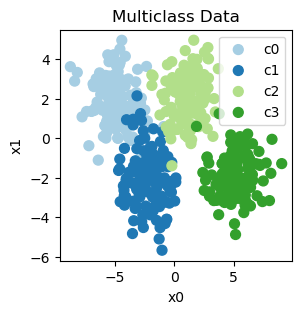

In [6]:
plt_mc(X,y,classes, centers, std=std)

C:\Users\lsi8012\AppData\Local\Temp\ipykernel_26632\3951430724.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


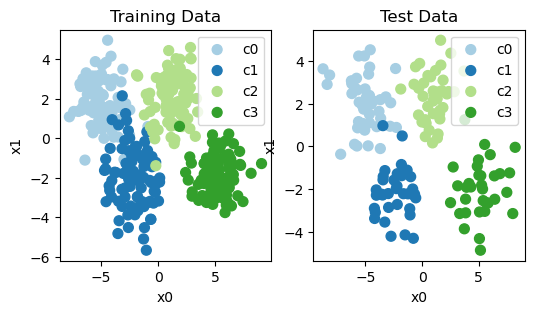

In [7]:
# split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# plot side by side subplots on training and test data
fig,ax = plt.subplots(1,2,figsize=(6,3))
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
plt_mc_data(ax[0], X_train,y_train,classes, map=plt.cm.Paired, legend=True, size=50, equal_xy = False)
ax[0].set_title("Training Data")
ax[0].set_xlabel("x0")
ax[0].set_ylabel("x1")
plt_mc_data(ax[1], X_test,y_test,classes, map=plt.cm.Paired, legend=True, size=50, equal_xy = False)
ax[1].set_title("Test Data")
ax[1].set_xlabel("x0")
ax[1].set_ylabel("x1")
plt.show()


## 2. Multiclass Classification
ML classifiers can be adapted for multi-class classification using various strategies:
* One vs. Rest: Each class is treated as a binary classification task against all other classes.
* One vs. One: Pairwise binary classification is performed for each pair of classes.
* Inherently Multiclass: These classifiers are designed to handle multi-class classification directly.
* Softmax (Multinominal Logistic Regression): This classifier uses the softmax activation function to directly support multi-class classification.

Let's explore each strategy in more detail below.

### 2.1. One-Vs-Rest
<img src="https://i.ytimg.com/vi/EYXSve6T5BU/maxresdefault.jpg" alt="Image" style="width:550px;"/>

- One-vs-rest (OvR for short, also referred to as One-vs-All or OvA) is a heuristic method for using binary classification algorithms for multi-class classification.
- It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.
- For example, here we are given a multi-class classification problem with examples for each class 'A', 'B', 'C' and 'D'. This could be divided into four binary classification datasets as follows:
    - Binary Classification Problem 1: A vs [B,C,D]
    - Binary Classification Problem 2: B vs [A,C,D]
    - Binary Classification Problem 3: C vs [A,B,D]
    - Binary Classification Problem 4: D vs [A,B,C]
- A possible downside of this approach is that it requires one model to be created for each class. For example, three classes requires three models. This could be an issue for large datasets (e.g. millions of rows), slow models (e.g. neural networks), or very large numbers of classes (e.g. hundreds of classes).
- This approach requires that each model predicts a class membership probability or a probability-like score. The argmax of these scores (class index with the largest score) is then used to predict a class. This approach is commonly used for algorithms that naturally predict numerical class membership probability or score, such as:
    - Logistic Regression
    - Perceptron

#### 2.1.1. Building a logistic regression using one vs. rest strategy

C:\Users\lsi8012\AppData\Local\Temp\ipykernel_26632\3951430724.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


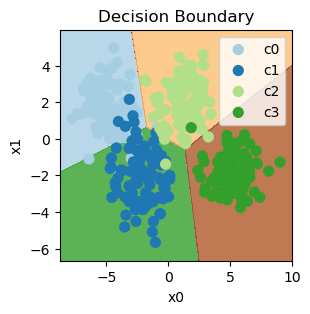

In [57]:
# build a logistic regression model with one vs all strategy on the data 

# from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
# fit the model
logit_model = LogisticRegression(multi_class='ovr', max_iter=1000)

logit_model.fit(X_train, y_train)


In [58]:
# make prediction on the test data
y_pred = logit_model.predict(X_test)

# output the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# output the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))


Confusion Matrix:
[[41  1  1  0]
 [ 1 34  0  0]
 [ 0  0 39  0]
 [ 0  0  1 32]]
Accuracy: 0.97


In [59]:
#output the prediction probabilities for the top 5 samples
y_pred_prob = logit_model.predict_proba(X_test)
print("Prediction Probabilities for the top 5 samples:", y_pred_prob[:5])

Prediction Probabilities for the top 5 samples: [[3.11013801e-07 5.37312155e-02 4.11809637e-02 9.05087510e-01]
 [6.02659718e-02 9.39673645e-01 4.53215114e-05 1.50617508e-05]
 [3.17495857e-03 1.45205000e-01 7.89185849e-01 6.24341926e-02]
 [8.64089985e-01 7.77843981e-02 5.81256130e-02 4.07900885e-09]
 [3.01701732e-01 4.31977268e-01 2.66157373e-01 1.63626563e-04]]


In [61]:
# sum up the probabilities for each sample
y_pred_prob_sum = np.sum(y_pred_prob, axis=1)
print("Sum of Prediction Probabilities for the top 5 samples:", y_pred_prob_sum[:5])

Sum of Prediction Probabilities for the top 5 samples: [1. 1. 1. 1. 1.]


C:\Users\lsi8012\AppData\Local\Temp\ipykernel_26632\3951430724.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


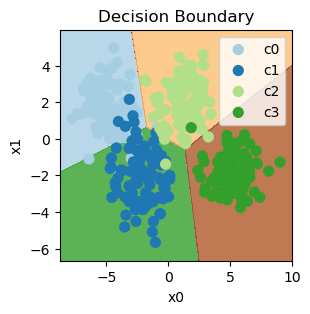

In [64]:
# plot the decision boundary for logistic regression
def plot_decision_boundary(X, y, model, ax, poly_degree=1):
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt_mc_data(ax, X, y, classes, map=plt.cm.Paired, legend=True, size=50, m='o', equal_xy = False)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
plot_decision_boundary(X_train, y_train, logit_model, ax)
ax.set_title("Decision Boundary")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
plt.show()


#### 2.1.2. Building a SVM classifier using one vs. rest strategy

In [65]:
# use svm to build a multiclass classifier on the data, using one vs one strategy
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
svm_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))
svm_classifier.fit(X_train, y_train)

# make prediction on the test data
y_pred = svm_classifier.predict(X_test)

# output the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# output the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

# output the prediciton probabilities
y_pred_prob = svm_classifier.decision_function(X_test)
print("Prediction Probabilities:")
print(y_pred_prob[:5])



Confusion Matrix:
[[42  0  1  0]
 [ 2 33  0  0]
 [ 0  0 39  0]
 [ 0  0  1 32]]
Accuracy: 0.97
Prediction Probabilities:
[[ -7.80556006  -1.90165138  -2.20201513   2.58624581]
 [ -1.55079987   3.46633809  -6.85227073  -6.56811473]
 [ -3.91702508  -2.62070206  -1.3281254   -2.66606289]
 [  2.45370547  -1.8086239   -1.74357071 -11.48644325]
 [ -1.43506419  -1.76618     -1.98946802  -6.16060492]]


In [66]:
## sum up the probabilities for each sample
y_pred_prob_sum = np.sum(y_pred_prob, axis=1)
print("Sum of Prediction Probabilities for the top 5 samples:", y_pred_prob_sum[:5])

Sum of Prediction Probabilities for the top 5 samples: [ -9.32298076 -11.50484723 -10.53191542 -12.58493239 -11.35131712]


### 2.2. One vs. One
<img src="https://miro.medium.com/v2/resize:fit:1056/1*4xjYPBsT9ZHOe3u0MIRB2A.jpeg" alt="Image" style="width:450px;"/>

- One-vs-One (OvO for short) is another heuristic method for using binary classification algorithms for multi-class classification. Like one-vs-rest, one-vs-one splits a multi-class classification dataset into binary classification problems. Unlike one-vs-rest that splits it into one binary dataset for each class, the one-vs-one approach splits the dataset into one dataset for each class versus every other class.
- For example, this problem is a multi-class classification problem with four classes: A, B, C and D. This could be divided into six binary classification datasets as follows:
    - Binary Classification Problem 1: A vs B
    - Binary Classification Problem 2: A vs C
    - Binary Classification Problem 3: A vs D
    - Binary Classification Problem 4: B vs C
    - Binary Classification Problem 5: B vs D
    - Binary Classification Problem 6: C vs D
- When predicting new points, each classifier votes on the class of the point, and the class with the most votes is chosen as the winner. In the event of a tie, you may select the class with the highest aggregate classification confidence by summing over the pair-wise classification confidence levels computed by the underlying binary classifiers. 
- The formula for calculating the number of binary datasets, and in turn, models, is as follows:`(NumClasses * (NumClasses – 1)) / 2`
- One-versus-one classifiers are both more computationally expensive, requiring far more classifiers to be trained, and less immediately interpretable. However, if the classifier being used scales poorly, and the dataset is sufficiently large, training this many two-class classifiers may be faster or provide better results than classification in the one-versus-rest scheme, which considers every point.
- **In practice, it rarely leads to better accuracy, plus its computation cost, causing it seldom used. Let's skip building model for this strategy.**

Let's skip implementing this one

### 2.3. Inherently multiclass:

Some machine learning classifiers inherently support multiclass classification, even though we may have previously used them primarily for binary classification tasks. Two such algorithms are decision trees and k-nearest neighbors (KNN):

#### 2.3.1.  Tree-based classifiers
* In decision trees, during prediction, an input instance traverses the tree from the root to a leaf node. The class label assigned to the instance is determined by a majority voting scheme among the instances in the leaf node.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*gyXO8xrS2XT8d8JnBztuOA.png" alt="Image" style="width:450px;"/>

Like decision trees, many tree-based classifiers inherently support multi-class classification without the need for any additional modifications or strategies, they include Random Forest, Gradient Boosting Trees (e.g., GradientBoostingClassifier), XGBoost (Extreme Gradient Boosting), LightGBM (Light Gradient Boosting Machine), CatBoost

For this simple dataset, let's only build a decision tree classifier next



In [19]:
# build a decision tree classifier on the data 

from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)



DecisionTreeClassifier()

In [21]:
# make prediction on the test data
y_pred = dt_classifier.predict(X_test)

# output the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# output the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))


Confusion Matrix:
[[40  3  0  0]
 [ 3 32  0  0]
 [ 0  0 39  0]
 [ 0  0  2 31]]
Accuracy: 0.95


In [ ]:
# plot the decision boundary for decision tree
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
plot_decision_boundary(X_train, y_train, dt_classifier, ax)
ax.set_title("Decision Boundary")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
plt.show()


#### 2.3.2.  kNN classifier

* For kNN, predictions are made by considering the majority vote among the k-nearest neighbors of the input instance.

<img src="https://ruslanmv.com/assets/images/posts/2022-04-10-Multiclass-Classification-with-Ensemble-Models/Multiclass_Classification_with_Ensemble_Models_57_5.png" alt="Image" style="width:450px;"/>

Let's build a KNN classifier next

In [22]:
# build a knn classifier on the data

from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)

# make prediction on the test data
y_pred = knn_classifier.predict(X_test)

# output the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# output the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))


Confusion Matrix:
[[42  1  0  0]
 [ 2 33  0  0]
 [ 0  0 39  0]
 [ 0  0  1 32]]
Accuracy: 0.97


C:\Users\lsi8012\AppData\Local\Temp\ipykernel_26632\3951430724.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


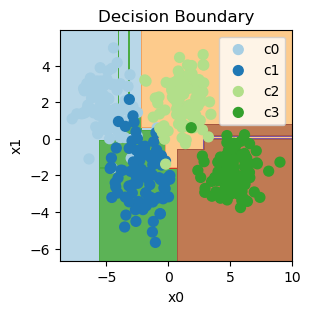

In [23]:
# plot the decision boundary for knn
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
plot_decision_boundary(X_train, y_train, model, ax)
ax.set_title("Decision Boundary")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
plt.show()


### 2.4. Softmax (Multinominal Logistic Regression)

#### 2.4.1 Softmax Function

In softmax regression, N outputs are generated and one output is selected as the predicted category. In this case a vector $\mathbf{z}$ is generated by a linear function which is applied to a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will add to 1, so that they can be interpreted as probabilities. The larger inputs  will correspond to larger output probabilities.
<center>  <img  src="./images/C2_W2_SoftmaxReg_NN.png" width="600" />  

The softmax function can be written:

$$a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} \tag{1}$$


Which shows the output is a vector of probabilities. The first entry is the probability the input is the first category given the input $\mathbf{x}$ and parameters $\mathbf{w}$ and $\mathbf{b}$.  
Let's create a NumPy implementation:



In [24]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

#### 2.4.2 Softmax Cost
<center> <img  src="./images/C2_W2_SoftMaxCost.png" width="400" />    <center/>

The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

Where y is the target category for this example and $\mathbf{a}$ is the output of a softmax function. In particular, the values in $\mathbf{a}$ are probabilities that sum to one.
>**Recall:** In this course, Loss is for one example while Cost covers all examples. 
 
 
Note in (3) above, only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise. 
    $$\mathbf{1}\{y == n\} = =\begin{cases}
    1, & \text{if $y==n$}.\\
    0, & \text{otherwise}.
  \end{cases}$$
Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

Where $m$ is the number of examples, $N$ is the number of outputs. This is the average of all the losses.



#### 2.4.3 Multinominal Logistic Regression

Let's build a model

In [26]:
from sklearn.linear_model import LogisticRegression


# Train multinomial logistic regression classifier
logreg_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg_classifier.fit(X_train, y_train)

# Get the predicted probabilities for each class
y_pred_probabilities = logreg_classifier.predict_proba(X_test)
y_pred_probabilities[:5]

array([[1.27216993e-09, 6.58037640e-05, 9.03350355e-03, 9.90900691e-01],
       [1.86756635e-02, 9.81322723e-01, 1.54807674e-06, 6.57915210e-08],
       [4.31359789e-04, 4.36819179e-02, 9.11318272e-01, 4.45684498e-02],
       [9.90363155e-01, 9.55004145e-03, 8.68035555e-05, 5.51400901e-11],
       [1.78749241e-01, 6.36063663e-01, 1.85022645e-01, 1.64450808e-04]])

In [27]:
y_pred = logreg_classifier.predict(X_test)
y_pred

array([3, 1, 2, 0, 1, 3, 0, 3, 2, 0, 3, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0, 3,
       0, 2, 3, 2, 2, 3, 1, 0, 3, 0, 0, 0, 2, 2, 1, 3, 1, 2, 2, 3, 0, 3,
       2, 2, 1, 2, 1, 0, 0, 3, 1, 1, 2, 0, 2, 1, 3, 2, 0, 1, 0, 3, 2, 3,
       2, 1, 2, 1, 1, 2, 1, 0, 1, 3, 1, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1,
       0, 1, 1, 0, 3, 1, 1, 2, 0, 0, 0, 2, 3, 2, 0, 0, 0, 2, 1, 0, 1, 1,
       0, 2, 1, 0, 3, 3, 2, 3, 2, 0, 2, 2, 3, 3, 2, 3, 1, 2, 0, 2, 2, 2,
       2, 3, 0, 3, 3, 3, 3, 1, 0, 0, 3, 3, 1, 3, 0, 0, 1, 2])

In [29]:
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
pd.DataFrame(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [30]:
confusion_matrix(y_test,y_pred)

array([[40,  2,  1,  0],
       [ 1, 34,  0,  0],
       [ 0,  0, 39,  0],
       [ 0,  0,  1, 32]], dtype=int64)

#### 2.4.4 Softmax Classifier in Neural Nets


`MLPClassifier` in scikit-learn is a multi-layer perceptron (MLP) classifier, which is a type of artificial neural network. It can be used for multi-class classification tasks by learning a mapping from input features to output class labels.

In [36]:
# build a neural network classifier on the data
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_classifier.fit(X_train, y_train)

# make prediction on the test data
y_pred = mlp_classifier.predict(X_test)

# output the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# output the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Confusion Matrix:
[[41  1  1  0]
 [ 1 34  0  0]
 [ 0  0 39  0]
 [ 0  0  1 32]]
Accuracy: 0.97


In [37]:
y_pred_prob = mlp_classifier.predict_proba(X_test)
print("Prediction Probabilities:", y_pred_prob[:5])

Prediction Probabilities: [[5.29321025e-06 1.53524956e-04 1.35704812e-03 9.98484134e-01]
 [5.29685640e-03 9.94697434e-01 4.91425201e-06 7.95074005e-07]
 [1.98693547e-03 9.67208237e-03 9.53343590e-01 3.49973920e-02]
 [9.87874204e-01 1.21049867e-02 1.92330398e-05 1.57655470e-06]
 [2.52603995e-01 6.64676919e-01 7.79614839e-02 4.75760137e-03]]


In [38]:
# add all probabities for each instance 
y_pred_prob.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Noticeably, the sum of probabilities for each instance totals to 1, a characteristic indicative of the use of softmax for multi-class classification. Now, let's take a step further and explicitly construct a neural network classifier, specifying the output layer with softmax activation

In [41]:
# build a neural network classifier on the data
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


keras_classifier = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
keras_classifier.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

keras_classifier.fit(
    X_train,y_train,
    epochs=10
)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6796  
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2854 
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0644   
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.9081 
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8159
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.7029
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6294 
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5242   
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.4845
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4256


Because the softmax is integrated into the output layer, the output is a vector of probabilities.

In [42]:
p_nonpreferred = keras_classifier.predict(X_test)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[0.01367646 0.02734304 0.04023824 0.91874224]
 [0.09032896 0.85709137 0.03982466 0.01275495]]
largest value 0.9969302 smallest value 0.0003037997


In [43]:
# output accuracy and confusion matrix
y_pred = np.argmax(p_nonpreferred, axis=1)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.9733333333333334
[[43  0  0  0]
 [ 2 33  0  0]
 [ 1  0 38  0]
 [ 0  0  1 32]]


## 3. Accuracy, precision, recall, and f1 score for multiclass classification

In multiclass classification, accuracy is calculated in the same way as in binary classification, but precision, recall, and F1-score are calculated for each class individually.

Please refer to the following figure for the caculation

<img src="https://www.sefidian.com/wp-content/uploads/2023/04/image-40.png" alt="Image" style="width:450px;"/>

In [45]:
## output the performance metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.94      0.97        35
           2       0.97      0.97      0.97        39
           3       1.00      0.97      0.98        33

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In multiclass classification, these metrics are calculated separately for each class, and then typically aggregated using some form of averaging (e.g., micro-average, macro-average, weighted average) to obtain overall performance measures. This allows us to evaluate the classifier's performance on each class individually as well as on the entire dataset. 

In [46]:
## output the precision, recall and f1 score
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision: {:.2f}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred, average='macro')))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='macro')))


Precision: 0.98
Recall: 0.97
F1 Score: 0.97


In multiclass classification, macro-average and weighted average are two commonly used methods for aggregating performance metrics (such as precision, recall, and F1-score) across multiple classes to obtain overall performance measures.

Below is an explanation of each:


### Macro-averaging
**verage the precision and recall across all classes** to get the final macro-averaged precision and recall scores.

<img src="https://assets-global.website-files.com/6266b596eef18c1931f938f9/644afed8b72fe836c6eae060_class_guide_multi_abc13.png" alt="Image" style="width:450px;"/>


In [33]:
## output the precision, recall and f1 score
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision: {:.2f}".format(precision_score(y_test, y_pred, average='weighted')))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred, average='weighted')))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='weighted')))

Precision: 0.97
Recall: 0.97
F1 Score: 0.97


### Weighted averaging
This approach takes into account the balance of classes. You weigh each class based on its representation in the dataset. Then, you compute precision and recall as a weighted average of the precision and recall in individual classes.

Simply put, it would work like macro-averaging, but instead of dividing precision and recall by the number of classes, you give each class a fair representation based on the proportion it takes in the dataset. 

This approach is useful if you have an imbalanced dataset but want to assign larger importance to classes with more examples. 

## Congratulations!
In this lab you 
* Extended the binary classification to multiclass classification
* Explored different ML classifiers for multiclass classification
* Got to know softmax function, which is widely used in neural networks
* Explored the distinctions in performance metrics between multiclass and binary classification.
